# The Faber-Jackson relation and the Fundamental Plane

The luminosity of a galaxy and its velocity dispersion are related as a power law [Faber & Jackson, 1976](https://ui.adsabs.harvard.edu/abs/1976ApJ...204..668F/abstract)
$$L \propto \sigma^{\gamma} $$
The exponent $\gamma$ is found to be approximately 4. This relation is known as the Faber-Jackson (FJ) relation. It is applicable to early type (elliptical) galaxies, as opposed to the Tully-Fisher relation which relates a late-type galaxy's luminosity to its rotational velocity. 

The FJ relation does not give a complete picture of the properties of early type galaxies however. It is found that the velocity dispersion is also dependent on the size of the elliptical galaxy, also in the form of a power law. 

$$\sigma \propto L^{a}R^{b} $$

This became known as the Fundamental Plane (FP) of elliptical galaxies [Djorgovski, 1987](). The FJ relation can then be viewed as a projection of the FP, and it is therefore expected that the FJ relation will only hold well for a sample of galaxies with approximately the same size.

Here, the data from TNG-100 is used to look at these relations for a sample of early-type central galaxies.

In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.cosmology import FlatLambdaCDM

h = 0.678 #Planck 2015

def power_law (a, A, xmin, xmax):
    x = np.linspace(xmin, xmax)
    y= x**(a)*A
    return x,y

data_path = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_earlyType_Gas.pkl"
data = pd.read_pickle(data_path)
data["SubhaloHalfmassRadStellar_2D"] = (data["SubhaloHalfmassRadStellar"])*(3/4)/h #from 3d to 3d projection, from ckpc/h to kpc
sami = pd.read_csv("../data/SAMI/earlies.csv")

data_log = il.formatplot.log_formater(data)
sami_log = il.formatplot.log_formater(sami)

The stellar mass within the half-light (effective) radius $M_{*}(<R_e)$ is plotted as a function of the velocity dispersion of the galaxy. The velocity dispersion is the projected (1D) velocity. This is equivalent to comparing the luminosity of the galaxy to its velocity dispersion, as the luminosty of a star is proportional to its mass.

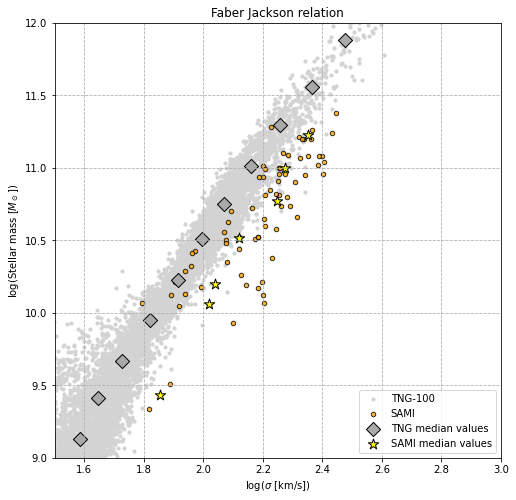

In [2]:
#Calculate median values
mx_TNG1, my_TNG1 = il.stats.median_values_log_y(data, "tng", "SubhaloVelDisp", "SubhaloMassStellar")
mx_S1, my_S1 = il.stats.median_values_log_y(sami, "sami", "sigma_re", "mstar")
#Draw figure
fig1, axs1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
#bins markers
"""
binsX = [0, 1000]
for Y in binsY:
    axs1.plot(binsX, [Y, Y], color = "black") 
"""
#all data points
data_log.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar",s=10, label = "TNG-100", alpha=1, color="lightgrey", ax = axs1)
sami_log.plot.scatter(x="sigma_re", y = "mstar", s=20, label = "SAMI", alpha=0.8, color="orange", ax = axs1, edgecolors = "black")
#Power law
FJx, FJy = power_law(a = 4, A= 10**2.2, xmin = 10, xmax = 1000)
#axs1.plot(FJx, FJy, color = "navy", label = r"$M_* \propto \sigma^{4} $")
#Plot median values
axs1.scatter(np.log10(mx_TNG1), np.log10(my_TNG1), marker = "D", label = "TNG median values", s = 100, color = "darkgrey", edgecolors = "black")
axs1.scatter(np.log10(mx_S1), np.log10(my_S1), marker = "*", label = "SAMI median values", color = "yellow",s = 120, edgecolors = "black")

il.formatplot.VD_SM(title ="Faber Jackson relation", ax = axs1)

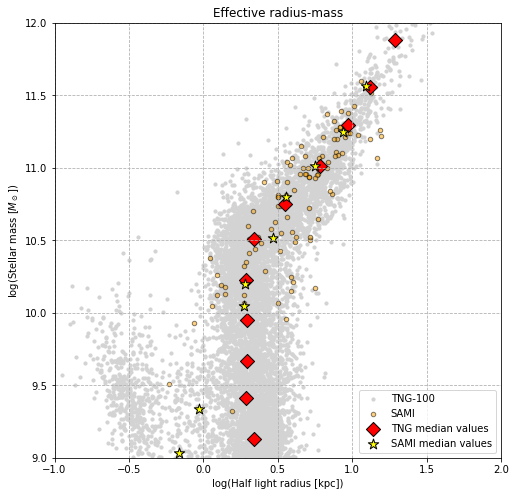

In [3]:
fig2, axs2 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
data_log.plot.scatter(x="SubhaloHalfmassRadStellar_2D", y="SubhaloMassStellar",s=10, label = "TNG-100", alpha=1, color="lightgrey", ax = axs2)
sami_log.plot.scatter(x="r_e_circ", y = "mstar", s=20, label = "SAMI", alpha=0.5, color="orange", ax = axs2, edgecolors = "black")

mx_TNG2, my_TNG2 = il.stats.median_values_log_y(data, "tng", "SubhaloHalfmassRadStellar_2D", "SubhaloMassStellar")
axs2.scatter(np.log10(mx_TNG2), np.log10(my_TNG2), marker = "D", label = "TNG median values", s = 100, color = "red", edgecolors = "black")

mx_S2, my_S2 = il.stats.median_values_log_y(sami, "sami", "r_e_circ", "mstar")
axs2.scatter(np.log10(mx_S2), np.log10(my_S2), marker = "*", label = "SAMI median values", color = "yellow",s = 120, edgecolors = "black")
il.formatplot.R_SM(title="Effective radius-mass", ax=axs2)

The power law is a pretty good fit for the majority of the sample, but it is clear that for the largest elliptical galaxies, the slope is decidely lower than 4. The FP relation gives the velocity dispersion as a function of both mass and radius, so if the M/R relation changes with given mass, this deviation is expected. To look at this posibility, the half-light mass as function of effective radius is plotted.

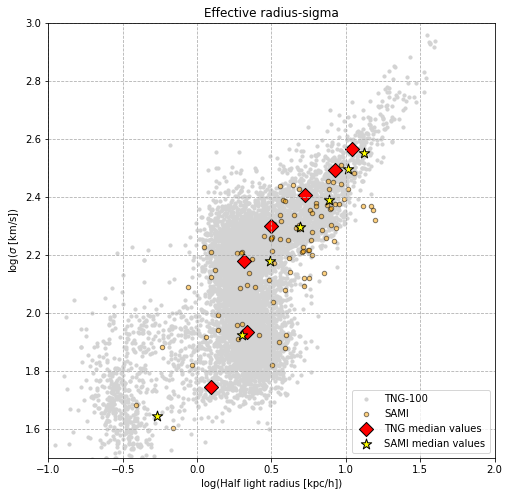

In [6]:
fig3, axs3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
data_log.plot.scatter(x="SubhaloHalfmassRadStellar_2D", y="SubhaloVelDisp_3D",s=10, label = "TNG-100", alpha=1, color="lightgrey", ax = axs3)
sami_log.plot.scatter(x="r_e_circ", y = "sigma_3kpc_round", s=20, label = "SAMI", alpha=0.5, color="orange", ax = axs3, edgecolors = "black")

mx_TNG3, my_TNG3 = il.stats.median_values(data, "tng", "SubhaloHalfmassRadStellar_2D", "SubhaloVelDisp_3D", ymin=10, ymax=400)
axs3.scatter(np.log10(mx_TNG3), np.log10(my_TNG3), marker = "D", label = "TNG median values", s = 100, color = "red", edgecolors = "black")

mx_S3, my_S3 = il.stats.median_values(sami, "sami", "r_e_circ", "sigma_3kpc_round", ymin=10, ymax=400)
axs3.scatter(np.log10(mx_S3), np.log10(my_S3), marker = "*", label = "SAMI median values", color = "yellow",s = 120, edgecolors = "black")
il.formatplot.R_VD(title="Effective radius-sigma", ax=axs3)

The relation between stellar mass and effective radius can also be fit to a power law. The FP can be understood more clearly by plotting the galaxies in the 3D velocity-mass-radius space. The points trace out a plane in the space with only small deviations.

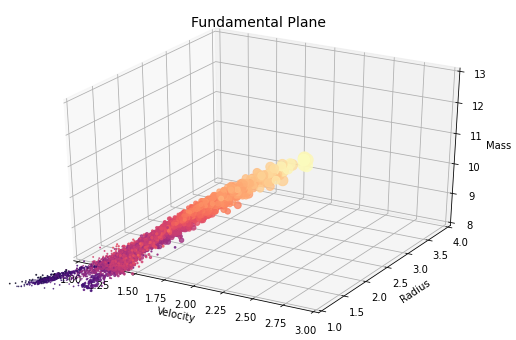

In [5]:

fig = il.formatplot.FP_3D(data)
plt.show()